# Analyzing internet download speeds using an iid Gaussian model with known variance

First, some housekeeping: loading libraries and setting up colors.

In [112]:
options(repr.plot.width=8, repr.plot.height=6, lwd = 4)
library("RColorBrewer")
colors = brewer.pal(12, "Paired")[c(1,2,7,8,3,4,5,6,9,10)]

# Analyzing internet download speeds using an iid Gaussian model with known variance

### Problem and Data
The maximum internet connection speed downstream in my home is 50 Mbit/sec. This maximum will typically never be reached, but my internet service provider (ISP) claims that the average speed is *at least* 20Mbit/sec. \
To test this, I collect a total of five measurements over the course of five consecutive using an speed testing internet service. I obtained:



In [113]:
x = c(15.77, 20.5, 8.26, 14.37, 21.09)

### Model

The measurements are assumed to be $$x_1,\ldots,x_n \overset{\mathrm{iid}}{\sim} \mathrm{N}(\theta,\sigma^2),$$ 
where $\theta$ is the average speed; we ignore for simplicity that the measurements cannot be negative. \
The measurements are reported to have a standard deviation of $\sigma=5$ 
by speed testing service and we take this as the given $\sigma$.

In [114]:
sigma2 = 5^2

### Prior

I will use a prior centered on the average claimed by the ISP, $\mu_0=20$, with a prior 
standard deviation of $\tau_0=5$. My prior beliefs are therefore that $\theta \in [10,30]$ with approximately $95\%$ probability.

In [115]:
mu_0 = 20
tau2_0 = 5^2

### Posterior

A normal prior for a normal model gives us a posterior which is also normal:

$$ \theta | \mathbf{x} \sim \mathrm{N}(\mu_n,\tau_n^2), $$
where the **posterior precision** (1/variance) is the sum of the data precision and the prior precision
$$ \frac{1}{\tau_n^2} = \frac{n}{\sigma^2} + \frac{1}{\tau_0^2}  $$
and the **posterior mean** is a weighted average of the sample mean and the prior mean
$$ \mu_n = w \bar x + (1-w)\mu_0$$
where the weight is the relative precision of the data and prior information
$$ w = \frac{n/\sigma^2}{n/\sigma^2 + 1/\tau_0^2}$$

Let's write a small function that computes the posterior mean and variance, and plots the prior, likelihood and posterior.

In [128]:
postGaussianIID <- function(x, mu_0, tau2_0, sigma2, thetaGrid){
    
    # compute posterior mean and variance
    n = length(x)
    tau2_n = 1/(n/sigma2 + 1/tau2_0) 
    w = (n/sigma2)/(n/sigma2 + 1/tau2_0)
    mu_n = w*mean(x) + (1-w)*mu_0
    
    # plot pdfs
    priorPDF = dnorm(thetaGrid, mean = mu_0, sd = sqrt(tau2_0))
    postPDF = dnorm(thetaGrid, mean = mu_n, sd = sqrt(tau2_n))
    normLikePDF = dnorm(thetaGrid, mean = mean(x[1:n]), sd = sqrt(sigma2/n)) # This is the likelihood, normalized to be a PDF (from plotting purposes)
    plot(thetaGrid, priorPDF, type = "l", lwd = 4, col = colors[6], xlab = expression(theta), ylab = "density", ylim = c(0,max(priorPDF,postPDF,normLikePDF)))
    lines(thetaGrid, normLikePDF, lwd = 4, col = colors[2])
    lines(thetaGrid, postPDF, lwd = 4, col = colors[4])
    legend(x = "topright", inset=.05, legend = c("Prior", "Likelihood (normalized)", "Posterior"), cex = c(1,1,1),
       lty = c(1, 1, 1), pt.lwd = c(3, 3, 3), col = c(colors[6], colors[2], colors[4]))
    
    return(list("mu_n" = mu_n, "tau2_n" = tau2_n, "w" = w))
}

Let us start by analyzing just the first observation $x_1=15.77$ using this function.

$mu_n
[1] 17.885

$tau2_n
[1] 12.5

$w
[1] 0.5

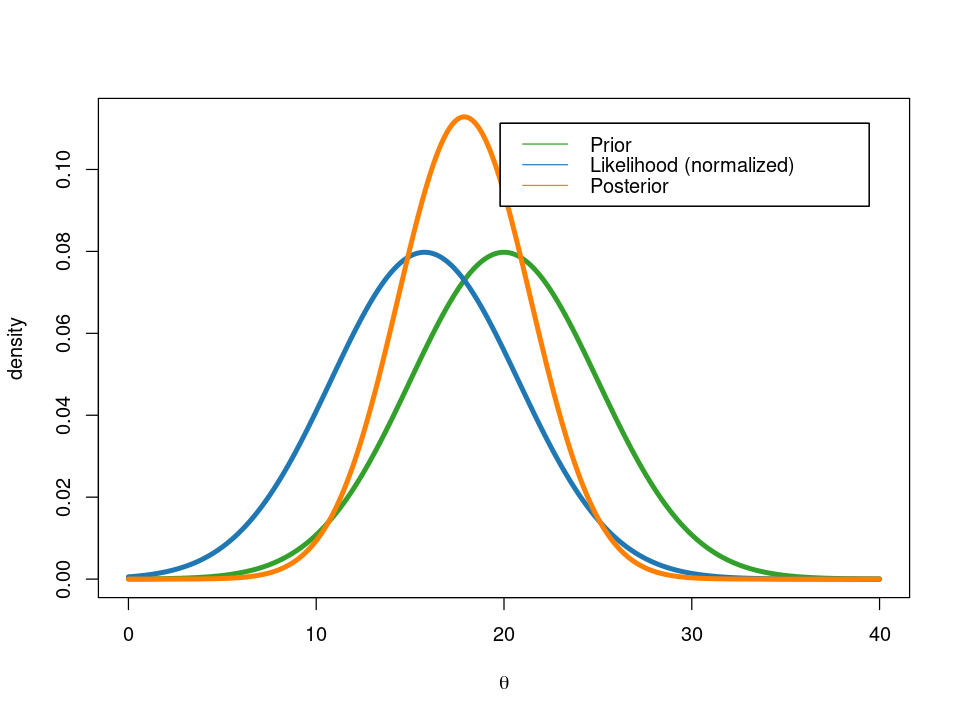

In [129]:
thetaGrid = seq(0, 40, length = 1000) # Some suitable grid of values to plot over
n = 1
post = postGaussianIID(x[1:n], mu_0, tau2_0, sigma2, thetaGrid)
post

We see that the prior and data information happen to get the same weight (w) in the posterior. That is a coincidence from the fact that the prior variance $\tau_0^2$ is the same as the data variance $\sigma^2$.

Moving on, let's add the next measurement to the analysis:

$mu_n
[1] 18.75667

$tau2_n
[1] 8.333333

$w
[1] 0.6666667

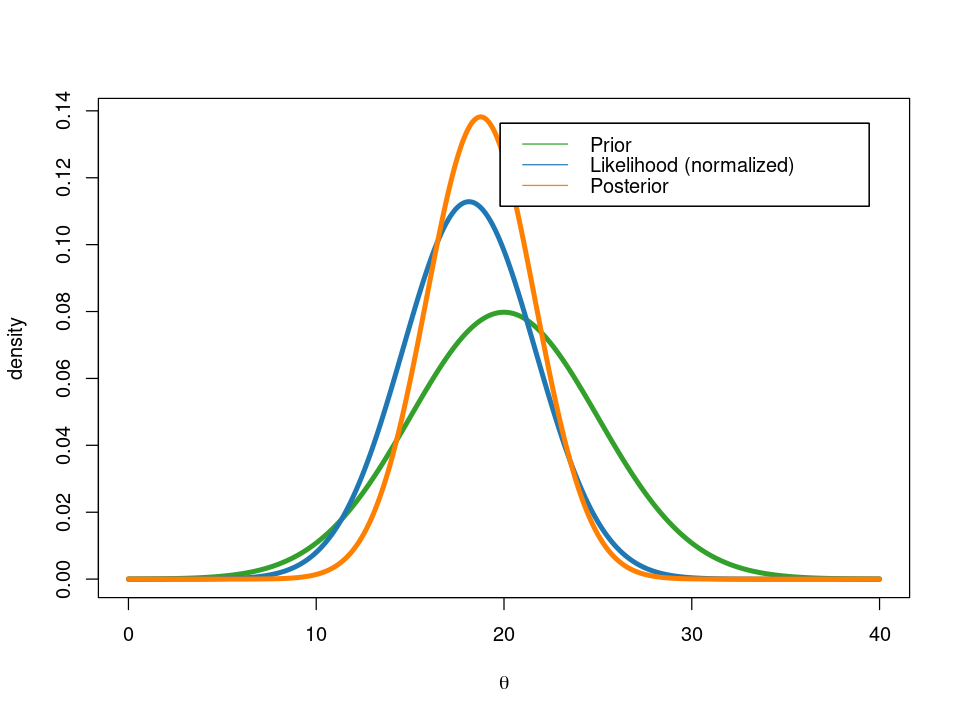

In [130]:
n = 2
post = postGaussianIID(x[1:n], mu_0, tau2_0, sigma2, thetaGrid)
post

We now see that the posterior is more affected by the data information than the prior information (w = 0.666).

Finally, adding all $n=5$ data points gives:

$mu_n
[1] 16.665

$tau2_n
[1] 4.166667

$w
[1] 0.8333333

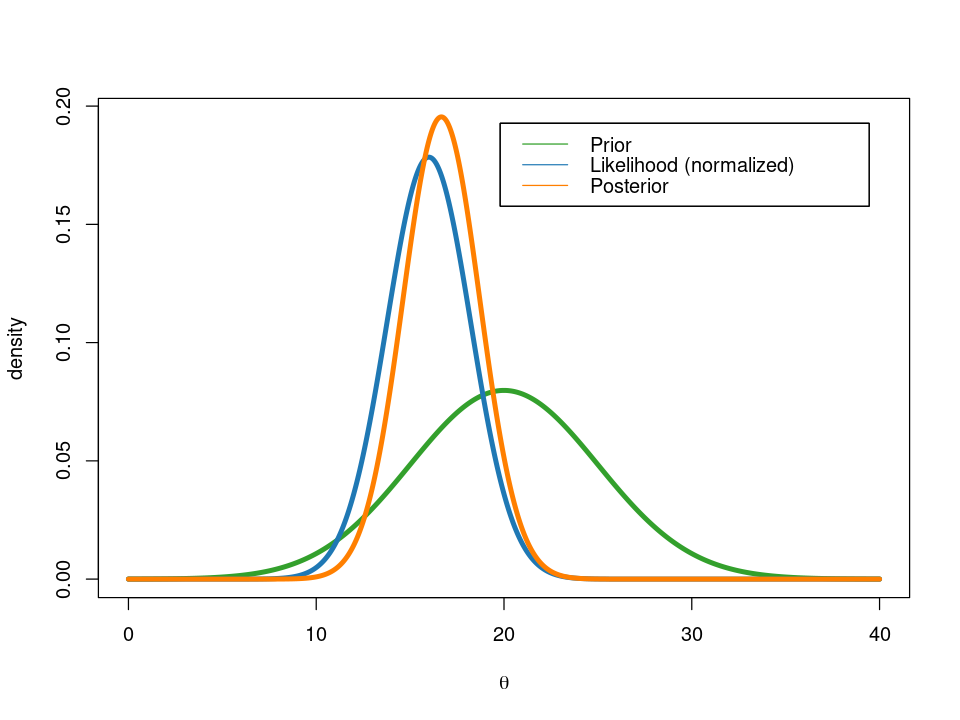

In [131]:
n = 5
post = postGaussianIID(x[1:n], mu_0, tau2_0, sigma2, thetaGrid)
post